In [1]:
%load_ext lab_black
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams["font.family"] = ["Arial"]

In [2]:
def plot_data(
    x1,
    y1,
    x2,
    y2,
    title=None,
    plot_resid=False,
    scatter_color="#4c73bf",
    line_color="C1",
    figsize=(4, 2.6),
    scatter_frac=0.5,
):
    xs = [x1, x2]
    ys = [y1, y2]
    fig, axes = plt.subplots(
        figsize=figsize, dpi=150, ncols=2, sharey=True, sharex=True
    )

    for i in range(2):
        ax = axes[i]
        x, y = xs[i], ys[i]
        subsample_idx = np.random.choice(
            np.arange(len(x)), size=int(len(x) * scatter_frac), replace=False
        )
        ax.axline((0, 0), slope=1, ls="--", color="gray", lw=2)
        ax.set_xlabel("PGS")
        reg = stats.linregress(y=y, x=x)
        resid = y - reg.intercept - reg.slope * x
        resid_sd = np.std(resid)
        print(f"## slope={reg.slope:.2g}, R2={reg.rvalue**2:.3g}")
        if plot_resid:
            ax.scatter(x[subsample_idx], resid[subsample_idx], s=1, color=scatter_color)
        else:
            ax.scatter(x[subsample_idx], y[subsample_idx], s=1, color=scatter_color)
            ax.axline(
                (0, reg.intercept), slope=reg.slope, ls="--", color=line_color, lw=1.0
            )

            # plot error bars
            err_x = np.quantile(x, [0.05, 0.5, 0.95])
            err_y = err_x * reg.slope + reg.intercept
            ax.errorbar(
                x=err_x,
                y=err_y,
                yerr=resid_sd * 1.96,
                capsize=3,
                lw=1.2,
                fmt=".",
                color=line_color,
            )
            ax.text(
                0.02,
                0.91,
                f"slope={reg.slope:.2g}, $R^2$={reg.rvalue**2:.3g}",
                size=8,
                transform=ax.transAxes,
            )
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.set_title(f"Subpop {i + 1}", fontsize=9)

    if plot_resid:
        axes[0].set_ylabel("Residual")
    else:
        axes[0].set_ylabel("Phenotype")

    if title is not None:
        fig.suptitle(title, y=0.9, x=0.55, fontsize=11)
    fig.tight_layout()
    return fig, axes

In [3]:
n = 10000

$$
y = x \beta + \sigma \mathcal{N}(0, 1)
$$

$\widehat{\beta} \approx \beta$

Steps:
1. Establish that variable $R^2$ come from 2 factors: variable slope, variable noise.
2. Seperately analyze 2 scenarios: what to do with variable slope? what to do with variable noise?
3. Analyze case when 2 cases appear together.
4. Which factor is more important?
5. Is variable slope about prediction accuracy?
6. Decompose the variable R2 into variable slope and variable noise??

# Example for variable prediciton accuracy by PC

In [4]:
np.random.seed(1)
x1 = np.random.normal(size=n, scale=1)
x2_true = np.random.normal(size=n, scale=1)
x2 = x2_true + np.random.normal(size=n, scale=1)
y1 = x1 + np.random.normal(size=n, scale=1)
y2 = x2_true + np.random.normal(size=n, scale=1)

## slope=0.99, R2=0.495
## slope=0.5, R2=0.253


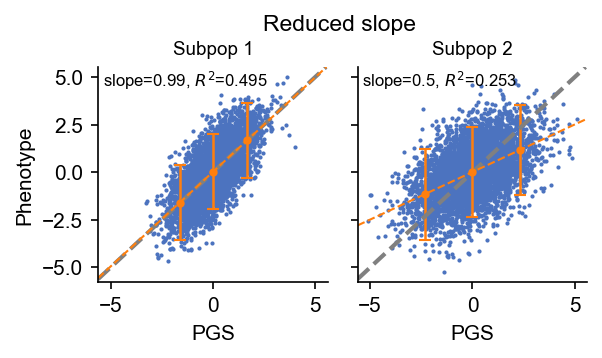

In [5]:
fig, axes = plot_data(
    x1=x1,
    y1=y1,
    x2=x2,
    y2=y2,
    title="Reduced slope",
    plot_resid=False,
)
fig.savefig("reduced_slope.png", bbox_inches="tight")

# Variable accuracy by sex.
Different slope, same $R^2$. 

In [6]:
x1 = np.random.normal(size=n)
# noise PGS measurement
x2 = np.random.normal(size=n)
y1 = x1 * 1 + np.random.normal(size=n, scale=1)
y2 = x2 * 2 + np.random.normal(size=n, scale=2)

## slope=0.99, R2=0.492
## slope=2, R2=0.502


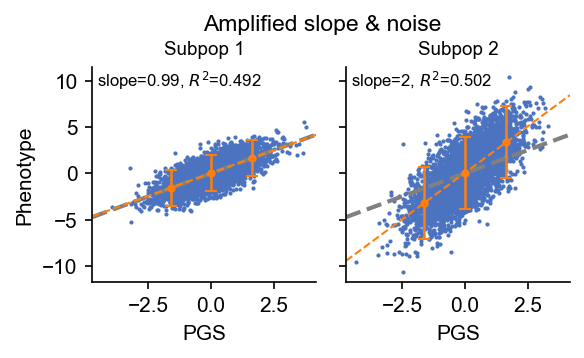

In [7]:
fig, axes = plot_data(
    x1=x1,
    y1=y1,
    x2=x2,
    y2=y2,
    title="Amplified slope & noise",
    plot_resid=False,
)
fig.savefig("amplified_slope.png", bbox_inches="tight")